<a href="https://colab.research.google.com/github/ElhamAlQahtani/gmail-virtru/blob/main/Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_excel('/content/Adoptoer-Nonadopter.xlsx')
data.head()

,Group,Rate,Q1,Q2,Q3,Pleaserateyourlevelofdisagreementoragreementwiththefollowingst_A,Pleaserateyourlevelofdisagreementoragreementwiththefollowingst_B,PleaseratethefollowingstatementsHowlikelyorunlikelyisitforcyberc,PleaseratethefollowingstatementsHowlikelyorunlikelyisitforcybe_A,PleaseratethefollowingstatementsHowlikelyorunlikelyisitforanyone,...,WhendoyouplantouseVirtru,IstronglyintendtouseVirtruwhenIsendtheseemails,Rateyourlevelofdisagreementoragreementwiththefollowingstatements,Rateyourlevelofdisagreementoragreementwiththefollowingstatemen_A,Howoldareyou,Whatisyourgender,Howwouldyoudescribeyouremploymentstatus,Doyouhaveanyexperienceworkinginorstudyingcomputerrelatedfields,Whatisthehighestlevelofeducationyouhavecompletedordegreeyouhavee,IstronglyintendtouseVirtruwhenIsendtheseemails_1
0,Group1,0,4,4,2,2,1,4,4,4,...,2,1.0,4,4,2,1,4,0,4,1.0
1,Group1,0,3,2,3,3,3,3,3,3,...,2,1.0,4,4,3,1,4,1,2,1.0
2,Group1,0,3,3,3,4,4,2,3,2,...,2,1.0,4,4,3,1,4,1,4,1.0
3,Group1,0,3,3,2,3,1,3,2,3,...,3,1.0,2,3,2,1,3,0,3,1.0
4,Group1,0,4,4,4,4,4,1,1,1,...,2,1.0,4,4,2,1,4,0,3,1.0


In [2]:
q1 = data[['Group','Q1']]
q1.head()

,Group,Q1
0,Group1,4
1,Group1,3
2,Group1,3
3,Group1,3
4,Group1,4


In [3]:
q1_map =  {1:'Strongly disagree', 2: 'Somewhat disagree', 3:'Somewhat agree', 4:'Strongly agree'}
q1['question1'] = q1['Q1'].map(q1_map)
q1.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Group,Q1,question1
0,Group1,4,Strongly agree
1,Group1,3,Somewhat agree
2,Group1,3,Somewhat agree
3,Group1,3,Somewhat agree
4,Group1,4,Strongly agree


In [6]:

q1['question1'].value_counts(normalize = True)

Somewhat agree       0.397959
Strongly agree       0.275510
Somewhat disagree    0.244898
Strongly disagree    0.081633
Name: question1, dtype: float64

In [14]:
plot_data = q1.groupby('Group').agg({'question1':['count']})
plot_data.head()

,question1
,count
Group,
Group1,34
Group2,35
Group3,29


In [16]:
plot_data.columns = ['question1']

In [17]:
plot_data.head()

,question1
Group,
Group1,34
Group2,35
Group3,29


In [24]:
plot_data = q1.pivot_table(index = ['Group'],columns = ['question1'])
plot_data.head()

Q1                                                   
question1 Somewhat agree Somewhat disagree Strongly agree Strongly disagree
Group                                                                      
Group1               3.0               2.0            4.0               NaN
Group2               3.0               2.0            4.0               1.0
Group3               3.0               2.0            4.0               1.0

In [26]:
plot_data.columns = ['Strongly disagree', 'Somewhat disagree', 'Somewhat agree', 'Strongly agree']

In [27]:
plot_data

,Strongly disagree,Somewhat disagree,Somewhat agree,Strongly agree
Group,,,,
Group1,3.0,2.0,4.0,NaN
Group2,3.0,2.0,4.0,1.0
Group3,3.0,2.0,4.0,1.0


In [30]:
plot_data = plot_data.fillna(0)
plot_data

,Strongly disagree,Somewhat disagree,Somewhat agree,Strongly agree
Group,,,,
Group1,3.0,2.0,4.0,0.0
Group2,3.0,2.0,4.0,1.0
Group3,3.0,2.0,4.0,1.0


In [42]:
plot_data_norm = plot_data.div(plot_data.sum(axis = 1),axis = 0) * 100
plot_data_norm

,Strongly disagree,Somewhat disagree,Somewhat agree,Strongly agree
Group,,,,
Group1,33.333333,22.222222,44.444444,0.0
Group2,30.000000,20.000000,40.000000,10.0
Group3,30.000000,20.000000,40.000000,10.0


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


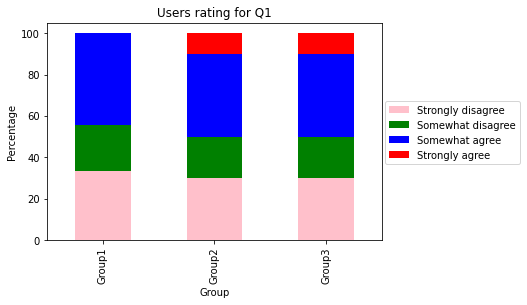

In [63]:
from matplotlib import colors
plot_data_norm.reset_index().plot(x = 'Group',kind = 'bar',
                                  stacked = True, title = 'Users rating for Q1', 
                                  color={'Strongly agree':'#FF0000','Somewhat agree':'blue', 'Somewhat disagree':'green','Strongly disagree':'pink'},
                  ylabel = 'Percentage');
#plt.yticks = ['0%','20%', '40%', '60%', '80%','100%']
plt.legend(loc = (1.01,0.35));

AttributeError: ignored

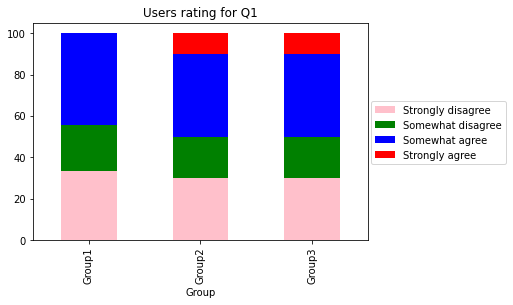

In [59]:
from matplotlib import colors
ax = plot_data_norm.reset_index().plot(x = 'Group',kind = 'bar',stacked = True, title = 'Users rating for Q1', color={'Strongly agree':'#FF0000','Somewhat agree':'blue', 'Somewhat disagree':'green','Strongly disagree':'pink'});
ax.yticks = ['0%','20%', '40%', '60%', '80%','100%']
ax.legend(loc = (1.01,0.35))
ax.show()